# CIFAR10 Example

#### This example shows how to use LearningRateTuner with a simple CNN on the CIFAR10 dataset
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
%matplotlib inline

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [22]:
import sys
sys.path.append('..')
from LearningRateTuner import LearningRateTuner

## 1. Load & Normalize CIFAR10

In [9]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

data_path = '.data/'

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


## 2. Define Model

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [23]:
net = Net()

## 3. Define a Loss Function and Optimizer

In [24]:
criterion = nn.CrossEntropyLoss()
# The choice of learning rate is not important, this will be tuned by LearningRateTuner
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

## 4. Tune and Set Optimal Learning Rate
Now, we iterate over the training set, adjusting the learning rate exponentially from 1e-8, ... ,10 for each batch.  
We record and plot the training loss for each batch, and suggest an optimal learning rate.

See Sylvain Gugger's post for a thorough explanation of the algorithm  
https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html

Min numerical gradient: 1.85E-03


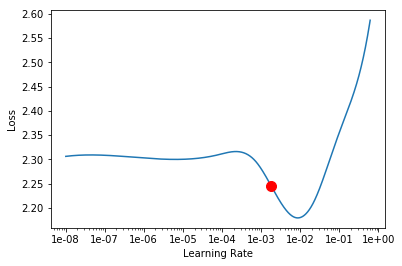

In [25]:
learning_rate_tuner = LearningRateTuner(
    net=net,
    criterion=criterion,
    optimizer=optimizer,
    data_loader=trainloader
)

optimal_learning_rate = learning_rate_tuner.tune_learning_rate()